# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Importing Dataset

chunksize = 100000
chunks = pd.read_csv("data/Syn.csv", chunksize=chunksize)

# Combine processed chunks into a single DataFrame
processed_chunks = []
for chunk in chunks:
    processed_chunks.append(chunk)
DDoS_attack_data = pd.concat(processed_chunks, ignore_index=True)



In [2]:
# DDoS_attack_data = pd.read_csv("data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
#Friday-WorkingHours-Afternoon-DDos.pcap_ISCX TCP-SYNC DATASET
chunksize = 100000
chunks = pd.read_csv("data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", chunksize=chunksize)

# Combine processed chunks into a single DataFrame
processed_chunks = []
for chunk in chunks:
    processed_chunks.append(chunk)
DDoS_attack_data = pd.concat(processed_chunks, ignore_index=True)

In [3]:
DDoS_attack_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
DDoS_attack_data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [5]:
DDoS_attack_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [6]:
DDoS_attack_data.shape

(225745, 79)

In [7]:
#DDoS_attack_data["Label"].unique()

DDoS_attack_data = DDoS_attack_data.drop_duplicates()

# Data Pre-Processing

## Data Cleaning

In [8]:
DDoS_attack_data.columns = DDoS_attack_data.columns.str.strip()

In [9]:
DDoS_attack_data = DDoS_attack_data.drop_duplicates()

DDoS_attack_data.isna().sum().sum()

list(DDoS_attack_data.columns[DDoS_attack_data.isna().sum() > 0])

DDoS_attack_data = DDoS_attack_data.dropna()

In [10]:

DDoS_attack_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
def clean_label(x):
    if x == "BENIGN":
        return 0
    else:
        return 1
        
DDoS_attack_data["Label_cleaned"] =  DDoS_attack_data["Label"].apply(clean_label)

DDoS_attack_data = DDoS_attack_data.drop(columns = ["Destination Port","Label"])



In [12]:
# np.isinf(DDoS_attack_data).sum().sum()
# import numpy as np
# import pandas as pd


# Select only numeric columns for the check
numeric_cols = DDoS_attack_data.select_dtypes(include=[np.number])

# Check for infinite values in numeric columns
inf_values_count = np.isinf(numeric_cols).sum().sum()
print(f"Number of infinite values in the numeric columns: {inf_values_count}")

# If there are infinite values, replace them with NaN
DDoS_attack_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values
missing_values_count = DDoS_attack_data.isnull().sum().sum()
print(f"Number of missing values: {missing_values_count}")


Number of infinite values in the numeric columns: 52
Number of missing values: 52


In [13]:
# Select numeric columns
numeric_cols = DDoS_attack_data.select_dtypes(include=[np.number])

# Filter out rows with infinities
DDoS_attack_data = DDoS_attack_data[~np.isinf(numeric_cols).any(axis=1)]

# Remove columns with a single unique value
DDoS_attack_data = DDoS_attack_data.loc[:, DDoS_attack_data.nunique() > 1]

# Display the head of the cleaned dataset
DDoS_attack_data.head()


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_cleaned
0,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,109,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,52,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,34,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [14]:
benign_df = DDoS_attack_data[DDoS_attack_data["Label_cleaned"] == 0]
DDoS_df = DDoS_attack_data[DDoS_attack_data["Label_cleaned"] == 1]

#bengin_df = benign_df.head(1000)
#DDoS_df = DDoS_df.head(1000)

bengin_df = benign_df.head(2000)
DDoS_df = DDoS_df.head(2000)

DDoS_attack_data = pd.concat([bengin_df, DDoS_df], axis = 0)

DDoS_attack_data.head(10)

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_cleaned
0,3,2,0,12,0,6,6,6.0,0.00000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,109,1,1,6,6,6,6,6.0,0.00000,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,52,1,1,6,6,6,6,6.0,0.00000,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,34,1,1,6,6,6,6,6.0,0.00000,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3,2,0,12,0,6,6,6.0,0.00000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
5,1022,2,0,12,0,6,6,6.0,0.00000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
6,4,2,0,12,0,6,6,6.0,0.00000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
7,42,1,1,6,6,6,6,6.0,0.00000,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
8,4,2,0,12,0,6,6,6.0,0.00000,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
9,4,2,0,37,0,31,6,18.5,17.67767,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [15]:


DDoS_attack_data = DDoS_attack_data.sample(frac=1, random_state=42).reset_index(drop=True)

DDoS_attack_data = DDoS_attack_data.loc[:, DDoS_attack_data.nunique() > 1]

In [16]:
# List of columns to drop
columns_to_drop = [
    'Unnamed: 0',
    'Flow ID',
    'Src IP','Source IP',
    'Dst IP',
    'Source Port', 
    'Destination IP',
    'Protocol', 
    'Timestamp', 
    'SimillarHTTP',
    'Inbound',
    
]

# Check for columns that exist in the dataset and drop them
columns_to_remove = list(set(columns_to_drop).intersection(set(DDoS_attack_data.columns)))
DDoS_attack_data = DDoS_attack_data.drop(columns=columns_to_remove, errors='ignore')

# Display the first few rows of the updated DataFrame
DDoS_attack_data.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_cleaned
0,23215,1,1,47,63,47,47,47.000000,0.000000,63,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,696891,3,5,26,11607,20,0,8.666667,10.263203,10135,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,23520,1,1,39,99,39,39,39.000000,0.000000,99,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,32055,3,5,26,11607,20,0,8.666667,10.263203,5840,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,865355,3,6,26,11607,20,0,8.666667,10.263203,5840,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [17]:
DDoS_attack_data.isna().sum().sum()
list(DDoS_attack_data.columns[DDoS_attack_data.isna().sum() > 0])

DDoS_attack_data = DDoS_attack_data.dropna()

In [18]:
DDoS_attack_data.head


<bound method NDFrame.head of       Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             23215                  1                       1   
1            696891                  3                       5   
2             23520                  1                       1   
3             32055                  3                       5   
4            865355                  3                       6   
...             ...                ...                     ...   
3995            190                  2                       2   
3996        4047677                  8                       7   
3997          49135                  2                       2   
3998         710789                  3                       6   
3999         869453                  3                       4   

      Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                              47                           63   
1                              26            

In [19]:
# Define feature (X) and target (Y) data
X = DDoS_attack_data.drop(columns=["Label_cleaned"]).values  # Feature data
Y = DDoS_attack_data["Label_cleaned"].values  # Target data

# Define split ratios
nb_train = int(len(DDoS_attack_data) * 0.6)  # 60% for training
nb_val = int(len(DDoS_attack_data) * 0.2)   # 20% for validation
nb_test = len(DDoS_attack_data) - nb_train - nb_val  # Remaining for testing

# Splitting the data
X_train = X[:nb_train]
Y_train = Y[:nb_train]

X_val = X[nb_train:nb_train + nb_val]
Y_val = Y[nb_train:nb_train + nb_val]

X_test = X[nb_train + nb_val:]
Y_test = Y[nb_train + nb_val:]


In [20]:
# print(DDoS_attack_data.columns)
# print(X)

print("Features shape:", X.shape)
print("Y shape:", Y.shape)

Features shape: (3997, 65)
Y shape: (3997,)


In [21]:
print("First row of X:", X[0])  # Should be an array of numerical feature values
print("First value of y:", Y[0])  # Should be the corresponding label


First row of X: [ 2.32150000e+04  1.00000000e+00  1.00000000e+00  4.70000000e+01
  6.30000000e+01  4.70000000e+01  4.70000000e+01  4.70000000e+01
  0.00000000e+00  6.30000000e+01  6.30000000e+01  6.30000000e+01
  0.00000000e+00  4.73831574e+03  8.61511953e+01  2.32150000e+04
  0.00000000e+00  2.32150000e+04  2.32150000e+04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.00000000e+01  2.00000000e+01
  4.30755977e+01  4.30755977e+01  4.70000000e+01  6.30000000e+01
  5.23333333e+01  9.23760431e+00  8.53333333e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.00000000e+00  7.85000000e+01  4.70000000e+01  6.30000000e+01
  2.00000000e+01  1.00000000e+00  4.70000000e+01  1.00000000e+00
  6.30000000e+01 -1.00000000e+00 -1.00000000e+00  0.00000000e+00
  2.00000000e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

In [22]:
# X = DDoS_attack_data.drop(columns=["Label_cleaned"]).columns.tolist()


In [23]:
X.shape
print(type(X))

<class 'numpy.ndarray'>


In [24]:
label_encoder = LabelEncoder()
DDoS_attack_data["Label_cleaned"] = label_encoder.fit_transform(DDoS_attack_data["Label_cleaned"])



In [25]:
# # Define split ratios
# nb_train = int(len(DDoS_attack_data) * 0.6)  # 70% for training
# nb_val = int(len(DDoS_attack_data) * 0.2)  # 15% for validation
# nb_test = len(DDoS_attack_data) - nb_train - nb_val  # Remaining for testing

# # Splitting the data
# X_train = DDoS_attack_data[X][:nb_train].values  # Input X for training
# Y_train = DDoS_attack_data["Label_cleaned"][:nb_train].values  # Target for training

# X_val = DDoS_attack_data[X][nb_train:nb_train + nb_val].values  # Input X for validation
# Y_val = DDoS_attack_data["Label_cleaned"][nb_train:nb_train + nb_val].values  # Target for validation

# X_test = DDoS_attack_data[X][nb_train + nb_val:].values  # Input X for testing
# Y_test = DDoS_attack_data["Label_cleaned"][nb_train + nb_val:].values  # Target for testing


In [26]:
std_scaler = StandardScaler()
scaled_features = std_scaler.fit_transform(X)

In [27]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, Y_train)

y_pred = rf.predict(X_test)
acc_def = accuracy_score(Y_test, y_pred)
print("Testing accuracy with pre-defined alogorithm: {}".format(np.round(acc_def,3)))

Testing accuracy with pre-defined alogorithm: 1.0


In [28]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the K-Fold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(rf, X, Y, cv=kf)

# Print the results
print("Cross-validation scores:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())


Cross-validation scores: [1.         0.99875    0.99874844 0.99749687 0.99624531]
Mean accuracy: 0.9982481226533165


In [29]:
label_encoder = LabelEncoder()
DDoS_attack_data["Label_cleaned"] = label_encoder.fit_transform(DDoS_attack_data["Label_cleaned"])

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00       415

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Confusion Matrix:
 [[385   0]
 [  0 415]]
Accuracy Score: 1.0


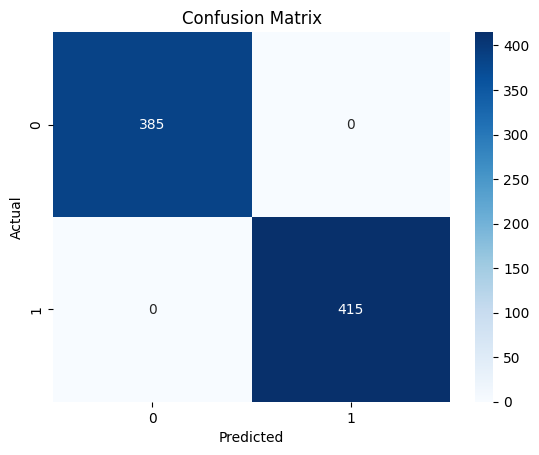

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Accuracy Score:", accuracy_score(Y_test, y_pred))

# Visualization: Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model = RandomForestClassifier(
    #n_estimators=500,          # Number of trees
    #max_depth=50,              # Limit tree depth
    #min_samples_split=30,       # Minimum samples to split a node
    #min_samples_leaf=15,        # Minimum samples in a leaf node
    #max_features='sqrt',       # Consider sqrt of total features for each split
    random_state=42
)
model.fit(X_train_pca, Y_train)

y_pred_pca = model.predict(X_test_pca)

acc_def = accuracy_score(Y_test, y_pred_pca)
print("Testing accuracy with pre-defined alogorithm: {}".format(np.round(acc_def,3)))

Testing accuracy with pre-defined alogorithm: 0.998


from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees
    'max_depth': [None, 10, 20, 30],           # Maximum depth of trees
    'min_samples_split': [2, 5, 10],           # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider
    'bootstrap': [True, False]                 # Whether to use bootstrap samples
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                        # 5-fold cross-validation
    n_jobs=-1,                   # Use all available cores
    verbose=2,
    scoring='accuracy'           # You can choose other metrics like 'f1', 'roc_auc', etc.
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_pca, Y_train)

# Best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_rf.predict(X_test_pca)
accuracy = accuracy_score(Y_test, y_pred)
print(f"\nTest Set Accuracy: {accuracy:.4f}")

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model =LinearSVC()
svm_model.fit(X_train_scaled, Y_train)


LinearSVC()

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       385
           1       0.94      1.00      0.97       415

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800

Accuracy Score: 0.9675
Confusion Matrix:


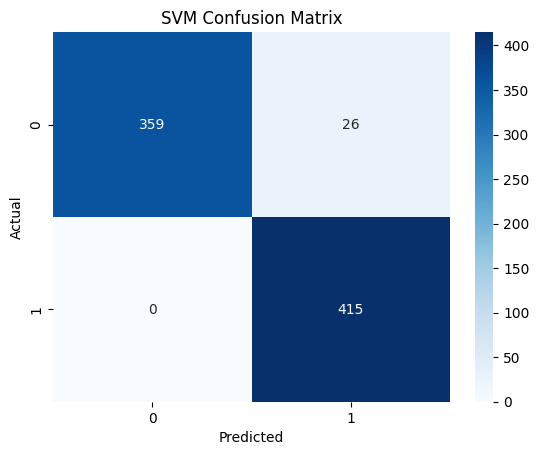

In [33]:

print("SVM Classification Report:")
svm_predictions = svm_model.predict(X_test_scaled)
print(classification_report(Y_test, svm_predictions))



print("Accuracy Score:", accuracy_score(Y_test, svm_predictions))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, svm_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [34]:
#DDoS_attack_data.to_csv('data/processed_data.csv', index=False)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       385
           1       0.94      1.00      0.97       415

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800

Accuracy Score: 0.96875
Confusion Matrix:


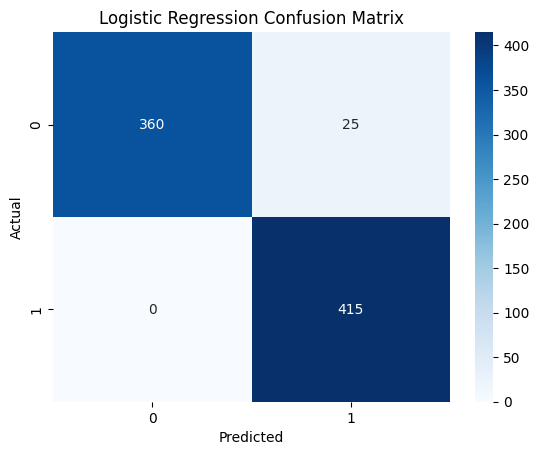

ROC-AUC Score: 0.998566734470349


In [35]:
from sklearn.linear_model import LogisticRegression


# Initialize the Logistic Regression model with hyperparameter constraints
log_reg_model = LogisticRegression(
    penalty='l2',   # Regularization type (l1 or l2)
    C=1.0,          # Inverse of regularization strength (lower values mean stronger regularization)
    solver='lbfgs', # Optimization algorithm (lbfgs, saga, etc.)
    max_iter=1000   # Maximum number of iterations
)

# Train the model
log_reg_model.fit(X_train_scaled, Y_train)

# Make predictions
log_reg_predictions = log_reg_model.predict(X_test_scaled)

# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, log_reg_predictions))

# Accuracy Score
print("Accuracy Score:", accuracy_score(Y_test, log_reg_predictions))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, log_reg_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optional: ROC-AUC Score
log_reg_probs = log_reg_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(Y_test, log_reg_probs)
print("ROC-AUC Score:", roc_auc)


In [36]:
import pickle

# Save the trained model to a pickle file
pickle_file_path = "model/rf_model.pkl"  
with open(pickle_file_path, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved as {pickle_file_path}")

Model saved as model/rf_model.pkl


In [37]:
print(rf)

RandomForestClassifier(random_state=42)


In [38]:
with open('model/svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)


In [39]:
with open('model/log_reg_model.pkl', 'wb') as file:
    pickle.dump(log_reg_model, file)

In [40]:
import os

validation_data = pd.DataFrame(X_val, columns=DDoS_attack_data.drop(columns=["Label_cleaned"]).columns)
validation_data["Label_cleaned"] = Y_val

# Ensure the 'data' folder exists
os.makedirs("data", exist_ok=True)

# Save the validation data to CSV
validation_data.to_csv("data/validation.csv", index=False)

print("Validation data saved as 'data/validation.csv'")

Validation data saved as 'data/validation.csv'


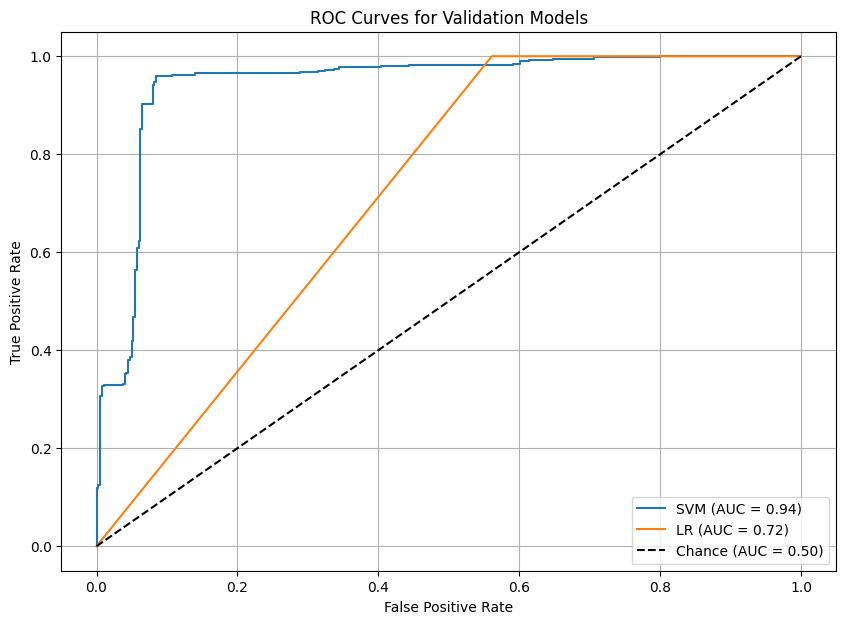

Model Performance:
SVM: AUC = 0.94, Accuracy = 0.76
LR: AUC = 0.72, Accuracy = 0.72


In [41]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.exceptions import NotFittedError  # Import NotFittedError
import pickle
import matplotlib.pyplot as plt

# Paths to your saved models
model_paths = {
    #"Random Forest": "model/rf_model.pkl",
    "SVM": "model/svm_model.pkl",
    "LR":"model/log_reg_model.pkl",

}

# Initialize dictionaries to store ROC AUC scores and accuracies
roc_auc_scores = {}
accuracy_scores = {}

# Plot ROC Curve for each model
plt.figure(figsize=(10, 7))
for model_name, model_path in model_paths.items():
    try:
        # Load the model
        with open(model_path, 'rb') as file:
            model = pickle.load(file)
        
        # Predict probabilities or scores
        if hasattr(model, "predict_proba"):  # For models with `predict_proba`
            y_probs = model.predict_proba(X_val)[:, 1]
            y_preds = model.predict(X_val)
        elif hasattr(model, "decision_function"):  # For models with `decision_function`
            y_probs = model.decision_function(X_val)
            y_preds = model.predict(X_val)
        else:  # For Sequential models or models with only `predict`
            y_probs = model.predict(X_val).ravel()  # Ensure 1D array
            y_preds = (y_probs > 0.5).astype(int)  # Thresholding for binary classification
        
        # Compute ROC AUC score
        roc_auc = roc_auc_score(Y_val, y_probs)
        roc_auc_scores[model_name] = roc_auc
        
        # Compute accuracy
        accuracy = accuracy_score(Y_val, y_preds)
        accuracy_scores[model_name] = accuracy
        
        # Compute ROC curve
        fpr, tpr, _ = roc_curve(Y_val, y_probs)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    
    except NotFittedError as e:
        print(f"Model {model_name} is not fitted. Please train it first.")
    except Exception as e:
        print(f"An error occurred with {model_name}: {e}")

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label="Chance (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Validation Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Display ROC AUC scores and accuracies
print("Model Performance:")
for model_name in roc_auc_scores.keys():
    print(f"{model_name}: AUC = {roc_auc_scores[model_name]:.2f}, Accuracy = {accuracy_scores[model_name]:.2f}")


In [42]:
# DDoS_attack_data_df['SYN/ACK_Ratio'] = DDoS_attack_data_df['SYN Flag Count'] / (DDoS_attack_data_df['ACK Flag Count'] + 1)

# # Create Half-Open Connections: Assuming Total Fwd and Backward Packets represent connection details
# DDoS_attack_data_df['Half_Open_Connections'] = DDoS_attack_data_df['Total Fwd Packets'] - DDoS_attack_data_df['Total Backward Packets']

# # Source IP Entropy: Count occurrences of each Source IP
# #DDoS_attack_data_df['Source_IP_Entropy'] = DDoS_attack_data_df.groupby('Source IP')['Source IP'].transform('count')

# # Selecting relevant features
# features = [
#     'SYN Flag Count', 'ACK Flag Count', 'SYN/ACK_Ratio',
#     'Half_Open_Connections',
# ]
# X = DDoS_attack_data_df[features]